In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart_failure_raw_df = pd.read_csv('/content/drive/MyDrive/Datasets/Heartfailure.zip')
heart_failure_df = heart_failure_raw_df.copy()
heart_failure_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#renaming DEATH_EVENT as patient_dead for my convenience
heart_failure_df.rename(columns = {'DEATH_EVENT':'patient_dead'}, inplace = True)
#drop the time column which is not necessary for our analysis
heart_failure_df.drop(['time'],axis=1, inplace =True, errors = 'ignore')
#changing the data type of age column from float to int
heart_failure_df.age = heart_failure_df.age.astype(int)
#changing the data type of following columns to bool type for our convenience
heart_failure_df[['anaemia','diabetes','high_blood_pressure', 'smoking', 'patient_dead']] = heart_failure_df[['anaemia','diabetes', 'high_blood_pressure', 'smoking', 'patient_dead']].astype(bool)
#changing the value of sex column to male or female
heart_failure_df['sex'] = np.where(heart_failure_df['sex'] == 1, 'Male','Female')
#to convert the platelet-count into kilo-platelets/mcL
heart_failure_df.platelets = (heart_failure_df. platelets/1000).astype(int)
heart_failure_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heart_failure_df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
patient_dead                False
dtype: bool

In [ ]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  patient_dead              299 non-null    bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 17.9+ KB


In [ ]:
heart_failure_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


In [ ]:
heart_failure_df.drop('creatinine_phosphokinase', inplace= True, axis=1, errors ='ignore')

In [ ]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int64  
 1   anaemia              299 non-null    bool   
 2   diabetes             299 non-null    bool   
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    bool   
 5   platelets            299 non-null    int64  
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    object 
 9   smoking              299 non-null    bool   
 10  patient_dead         299 non-null    bool   
dtypes: bool(5), float64(1), int64(4), object(1)
memory usage: 15.6+ KB


In [ ]:
column_details_df=pd.read_html("https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1 ")[0]
column_details_df.drop('Range',inplace=True,axis=1,errors='ignore')
column_details_df.drop([3,4,7,13],inplace=True,axis=0,errors='ignore')
column_details_df.columns=['feature','explanation','measurement_unit']
column_details_df

,feature,explanation,measurement_unit
0,Age,Age of the patient,Years
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean
2,High blood pressure,If a patient has hypertension,Boolean
5,Diabetes,If the patient has diabetes,Boolean
6,Ejection fraction,Percentage of blood leaving,Percentage
8,Sex,Woman or man,Binary
9,Platelets,Platelets in the blood,kiloplatelets/mL
10,Serum creatinine,Level of creatinine in the blood,mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L
12,Smoking,If the patient smokes,Boolean


In [ ]:
column_details_df=column_details_df.reindex([0,1,5,6,2,9,10,11,8,12,14])
column_details_df.feature=heart_failure_df.columns
column_details_df.set_index(['feature'], inplace =True)
column_details_df

,explanation,measurement_unit
feature,,
age,Age of the patient,Years
anaemia,Decrease of red blood cells or hemoglobin,Boolean
diabetes,If the patient has diabetes,Boolean
ejection_fraction,Percentage of blood leaving,Percentage
high_blood_pressure,If a patient has hypertension,Boolean
platelets,Platelets in the blood,kiloplatelets/mL
serum_creatinine,Level of creatinine in the blood,mg/dL
serum_sodium,Level of sodium in the blood,mEq/L
sex,Woman or man,Binary


In [ ]:
column_details_df["normal_value"] = ['None',
                                     'None',
                                     'None',
                                     '55% - 70%',
                                     'None',
                                     '150 - 400 kilo-platelets / mcL',
                                     '0.6 - 1.2 mg/dL',
                                     '135 - 145 mEq /L',
                                     'None', 'None', 'None'
                                    ]
column_details_df

,explanation,measurement_unit,normal_value
feature,,,
age,Age of the patient,Years,None
anaemia,Decrease of red blood cells or hemoglobin,Boolean,None
diabetes,If the patient has diabetes,Boolean,None
ejection_fraction,Percentage of blood leaving,Percentage,55% - 70%
high_blood_pressure,If a patient has hypertension,Boolean,None
platelets,Platelets in the blood,kiloplatelets/mL,150 - 400 kilo-platelets / mcL
serum_creatinine,Level of creatinine in the blood,mg/dL,0.6 - 1.2 mg/dL
serum_sodium,Level of sodium in the blood,mEq/L,135 - 145 mEq /L
sex,Woman or man,Binary,None


In [ ]:
column_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, age to patient_dead
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   explanation       11 non-null     object
 1   measurement_unit  11 non-null     object
 2   normal_value      11 non-null     object
dtypes: object(3)
memory usage: 352.0+ bytes


In [ ]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int64  
 1   anaemia              299 non-null    bool   
 2   diabetes             299 non-null    bool   
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    bool   
 5   platelets            299 non-null    int64  
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    object 
 9   smoking              299 non-null    bool   
 10  patient_dead         299 non-null    bool   
dtypes: bool(5), float64(1), int64(4), object(1)
memory usage: 15.6+ KB


In [ ]:
heart_failure_df.describe()

,age,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,38.083612,263.327759,1.39388,136.625418
std,11.894997,11.834841,97.805105,1.03451,4.412477
min,40.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,80.000000,850.000000,9.40000,148.000000


In [ ]:
#Number of Male and Female
heart_failure_df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [ ]:
#Number of patients with anaemia
heart_failure_df.anaemia.value_counts()

False    170
True     129
Name: anaemia, dtype: int64

In [ ]:
#Number of patients with diabetes
heart_failure_df.diabetes.value_counts()

False    174
True     125
Name: diabetes, dtype: int64

In [ ]:
#Number of patients with high BP
heart_failure_df.high_blood_pressure.value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

In [ ]:
#Number of patients with smoking habit
heart_failure_df.smoking.value_counts()

False    203
True      96
Name: smoking, dtype: int64

In [ ]:
#Number of patients died during follow-up period
heart_failure_df.groupby(['patient_dead','sex']).size().reset_index().pivot(columns='patient_dead',index='sex',values=0)

patient_dead,False,True
sex,,
Female,71,34
Male,132,62


In [ ]:
#Number of patients with abnormal ejection fraction
column_details_df.normal_value['ejection_fraction']

'55% - 70%'

In [ ]:
abn_ef=heart_failure_df[(heart_failure_df.ejection_fraction < 55)| (heart_failure_df.ejection_fraction>70)]
abn_ef

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
1,55,False,False,38,False,263,1.1,136,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...
293,63,True,True,35,False,179,0.9,136,Male,True,False
294,62,False,True,38,True,155,1.1,143,Male,True,False
295,55,False,False,38,False,270,1.2,139,Female,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


In [ ]:
#Number of patients with abnormal platelets count
column_details_df.normal_value['platelets']

'150 - 400 kilo-platelets / mcL'

In [ ]:
abn_platelets=heart_failure_df[(heart_failure_df.platelets < 150)| (heart_failure_df.platelets>400)]
abn_platelets

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
6,75,True,False,15,False,127,1.20,137,Male,False,True
7,60,True,True,60,False,454,1.10,131,Male,True,True
12,45,True,False,30,False,136,1.10,137,Male,False,True
14,49,True,False,30,True,427,1.00,138,Female,False,False
15,82,True,False,50,False,47,1.30,136,Male,False,True
19,48,True,True,55,False,87,1.90,121,Female,False,True
25,80,False,True,38,False,149,1.90,144,Male,True,True
47,60,False,True,38,True,451,0.60,138,Male,True,True
48,80,True,False,20,True,140,4.40,133,Male,False,True
51,53,True,False,20,True,418,1.40,139,Female,False,True


In [ ]:
#to find the normal value of creatinine level in the blood
column_details_df.normal_value['serum_creatinine']

'0.6 - 1.2 mg/dL'

In [ ]:
abn_creatinine=heart_failure_df[(heart_failure_df.serum_creatinine < 0.6)| (heart_failure_df.serum_creatinine>1.2)]
abn_creatinine

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
5,90,True,False,40,True,204,2.1,132,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...
282,42,False,False,30,False,215,3.8,128,Male,True,False
286,60,False,False,35,False,279,1.7,140,Male,False,False
291,60,False,False,35,False,133,1.4,139,Male,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


In [ ]:
#to find the normal value of sodium level in the blood
column_details_df.normal_value['serum_sodium']

'135 - 145 mEq /L'

In [ ]:
abn_sodium=heart_failure_df[(heart_failure_df.serum_sodium < 135)| (heart_failure_df.serum_sodium>145)]
abn_sodium

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
5,90,True,False,40,True,204,2.1,132,Male,True,True
7,60,True,True,60,False,454,1.1,131,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...
270,44,False,True,30,True,263,1.6,130,Male,True,False
271,51,False,True,40,False,221,0.9,134,Female,False,False
272,67,False,False,38,False,215,1.2,133,Female,False,False
282,42,False,False,30,False,215,3.8,128,Male,True,False


In [ ]:
heart_failure_df.sample(5)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
128,61,False,False,30,True,267,0.7,136,Male,True,False
97,70,True,False,60,False,255,1.1,136,Female,False,False
56,70,True,False,35,False,223,2.7,138,Male,True,False
104,60,False,False,50,True,286,2.3,143,Female,False,False
182,65,False,True,25,False,265,1.2,136,Male,True,True


In [ ]:
import matplotlib as mp
import matplotlib.patches as mpatches
%matplotlib inline
sns.set_style('darkgrid')
mp.rcParams['font.size']=14
mp.rcParams['figure.figsize']=(9,5)
mp.rcParams['figure.facecolor']='white'

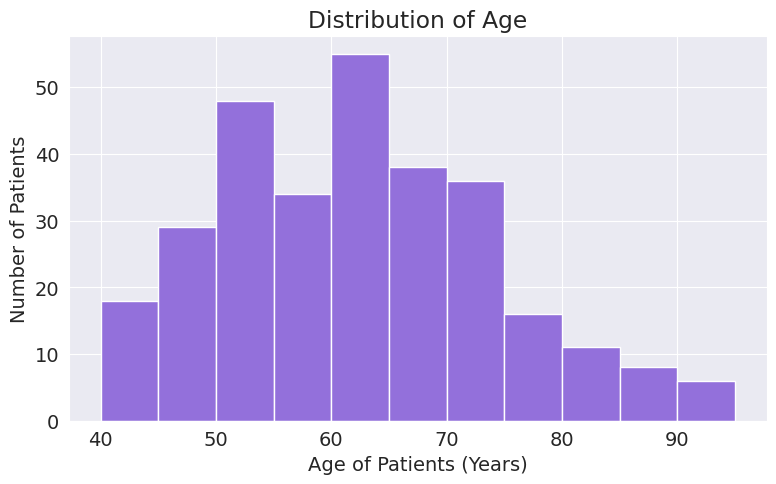

In [ ]:
plt.hist(heart_failure_df.age, bins=np.arange(40,100,5),color= 'mediumpurple')
plt.xlabel("Age of Patients (Years)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age");

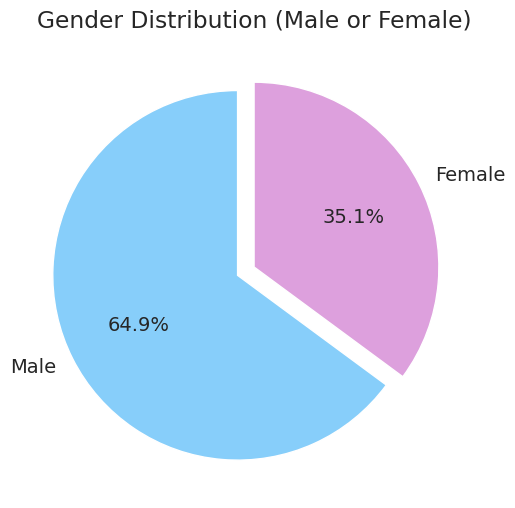

In [ ]:
#to store the gender counts into a variable
gender_counts=heart_failure_df.sex.value_counts()
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%.1f%%', startangle=90, explode=[0.1,0], colors=['lightskyblue','plum'])
plt.title("Gender Distribution (Male or Female)");

In [ ]:
#count number of patients dead
dead_counts= heart_failure_df.patient_dead.value_counts()
dead_counts

False    203
True      96
Name: patient_dead, dtype: int64

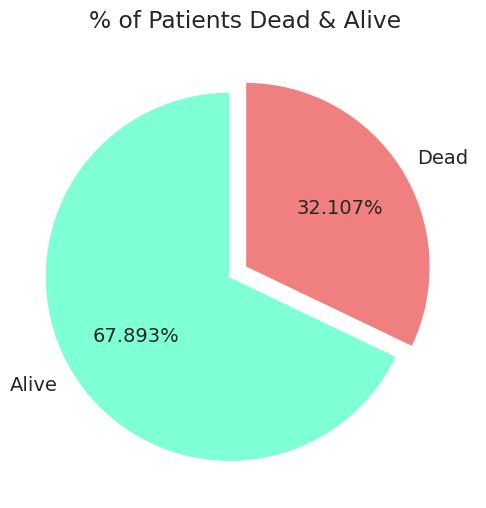

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(dead_counts,labels=['Alive','Dead'],autopct='%.3f%%', startangle=90, explode=[0.1,0], colors=['aquamarine','lightcoral'])
plt.title("% of Patients Dead & Alive");

In [ ]:
def create_range_series(number_series):
    """Creates a series with range(group) for the numeric values
    provided in another series which is passed as an argument.
    This function takes only one argument which is (Pandas) series object,
    returns another (Pandas) series object.

    Argument:
        number_series - A column in pandas data frame with numeric values.
    """
    condition = [
    (number_series >= 0) & (number_series < 5),
    (number_series >= 5) & (number_series < 10),
    (number_series >= 10) & (number_series < 15),
    (number_series >= 15) & (number_series < 20),
    (number_series >= 20) & (number_series < 25),
    (number_series >= 25) & (number_series < 30),
    (number_series >= 30) & (number_series < 35),
    (number_series >= 35) & (number_series < 40),
    (number_series >= 40) & (number_series < 45),
    (number_series >= 45) & (number_series < 50),
    (number_series >= 50) & (number_series < 55),
    (number_series >= 55) & (number_series < 60),
    (number_series >= 60) & (number_series < 65),
    (number_series >= 65) & (number_series < 70),
    (number_series >= 70) & (number_series < 75),
    (number_series >= 75) & (number_series < 80),
    (number_series >= 80) & (number_series < 85),
    (number_series >= 85) & (number_series < 90),
    (number_series >= 90) & (number_series < 95),
    (number_series >= 95) & (number_series < 100)
    ]

    output = ['0-5',
              '5-10',
              '10-15',
              '15-20',
              '20-25',
              '25-30',
              '30-35',
              '35-40',
              '40-45',
              '45-50',
              '50-55',
              '55-60',
              '60-65',
              '65-70',
              '70-75',
              '75-80',
              '80-85',
              '85-90',
              '90-95',
              '95-100'
              ]
    result = np.select(condition, output, '>100')
    return pd.Series(result)
#to create a column with age group
heart_failure_df['age_group'] = create_range_series(heart_failure_df.age)
heart_failure_df

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group
0,75,False,False,20,True,265,1.9,130,Male,False,True,75-80
1,55,False,False,38,False,263,1.1,136,Male,False,True,55-60
2,65,False,False,20,False,162,1.3,129,Male,True,True,65-70
3,50,True,False,20,False,210,1.9,137,Male,False,True,50-55
4,65,True,True,20,False,327,2.7,116,Female,False,True,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,True,38,True,155,1.1,143,Male,True,False,60-65
295,55,False,False,38,False,270,1.2,139,Female,False,False,55-60
296,45,False,True,60,False,742,0.8,138,Female,False,False,45-50
297,45,False,False,38,False,140,1.4,140,Male,True,False,45-50


In [ ]:
dead_patients=heart_failure_df[heart_failure_df.patient_dead==True].groupby('age_group').count()
alive_patients=heart_failure_df[heart_failure_df.patient_dead==False].groupby('age_group').count()

<ipython-input-62-64480c701d0e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=alive_patients.index,y=alive_patients.patient_dead,alpha=0.5,palette=['aquamarine'],estimator=sum,ci=None)


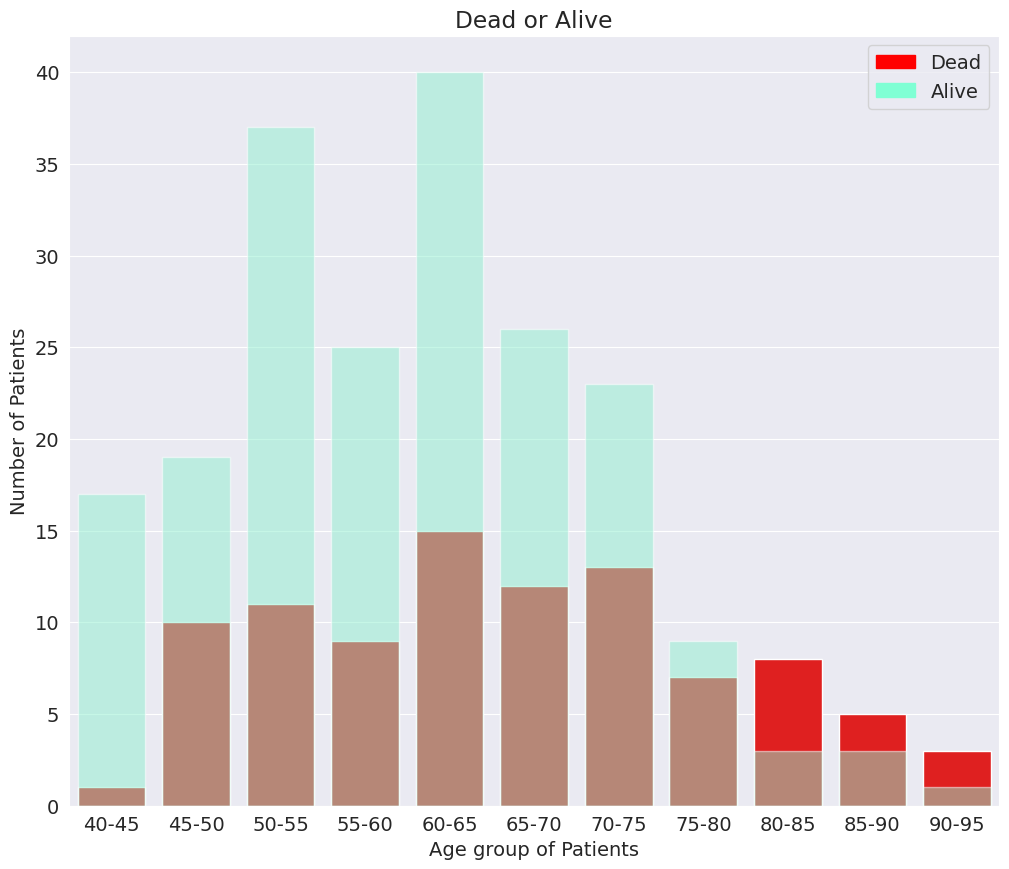

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=dead_patients.index,y=dead_patients.patient_dead,alpha=1,palette=['red'])
sns.barplot(x=alive_patients.index,y=alive_patients.patient_dead,alpha=0.5,palette=['aquamarine'],estimator=sum,ci=None)
plt.title("Dead or Alive")
plt.xlabel('Age group of Patients')
dead=mpatches.Patch(color='red',label='Dead')
alive= mpatches.Patch(color='aquamarine',label='Alive')
plt.legend(handles=[dead,alive])
plt.ylabel('Number of Patients');

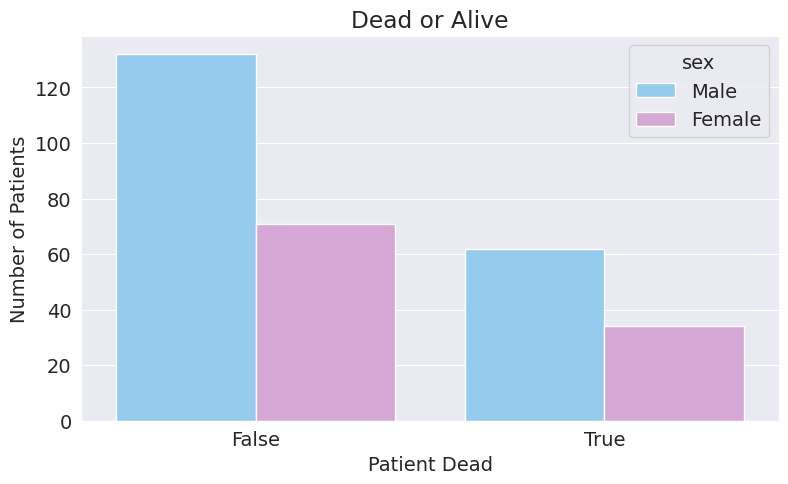

In [ ]:
sns.countplot(x=heart_failure_df.patient_dead,hue=heart_failure_df.sex, palette=['lightskyblue','plum'])
plt.title('Dead or Alive')
plt.xlabel('Patient Dead')
plt.ylabel('Number of Patients');

In [ ]:
heart_failure_df['abnormal_ef']= np.where(((heart_failure_df.ejection_fraction>=55)& (heart_failure_df.ejection_fraction<=70)), 'Normal', 'Abnormal')
heart_failure_df['abnormal_platelets'] = np.where(((heart_failure_df.platelets >= 150) & (heart_failure_df.platelets <= 400)) , 'Normal', 'Abnormal')
heart_failure_df['abnormal_creatinine'] = np.where(((heart_failure_df.serum_creatinine >= 0.6) & (heart_failure_df.serum_creatinine <= 1.2)), 'Normal','Abnormal')
heart_failure_df['abnormal_sodium'] = np.where(((heart_failure_df.serum_sodium >= 135) & (heart_failure_df.serum_sodium <= 145)) , 'Normal', 'Abnormal')

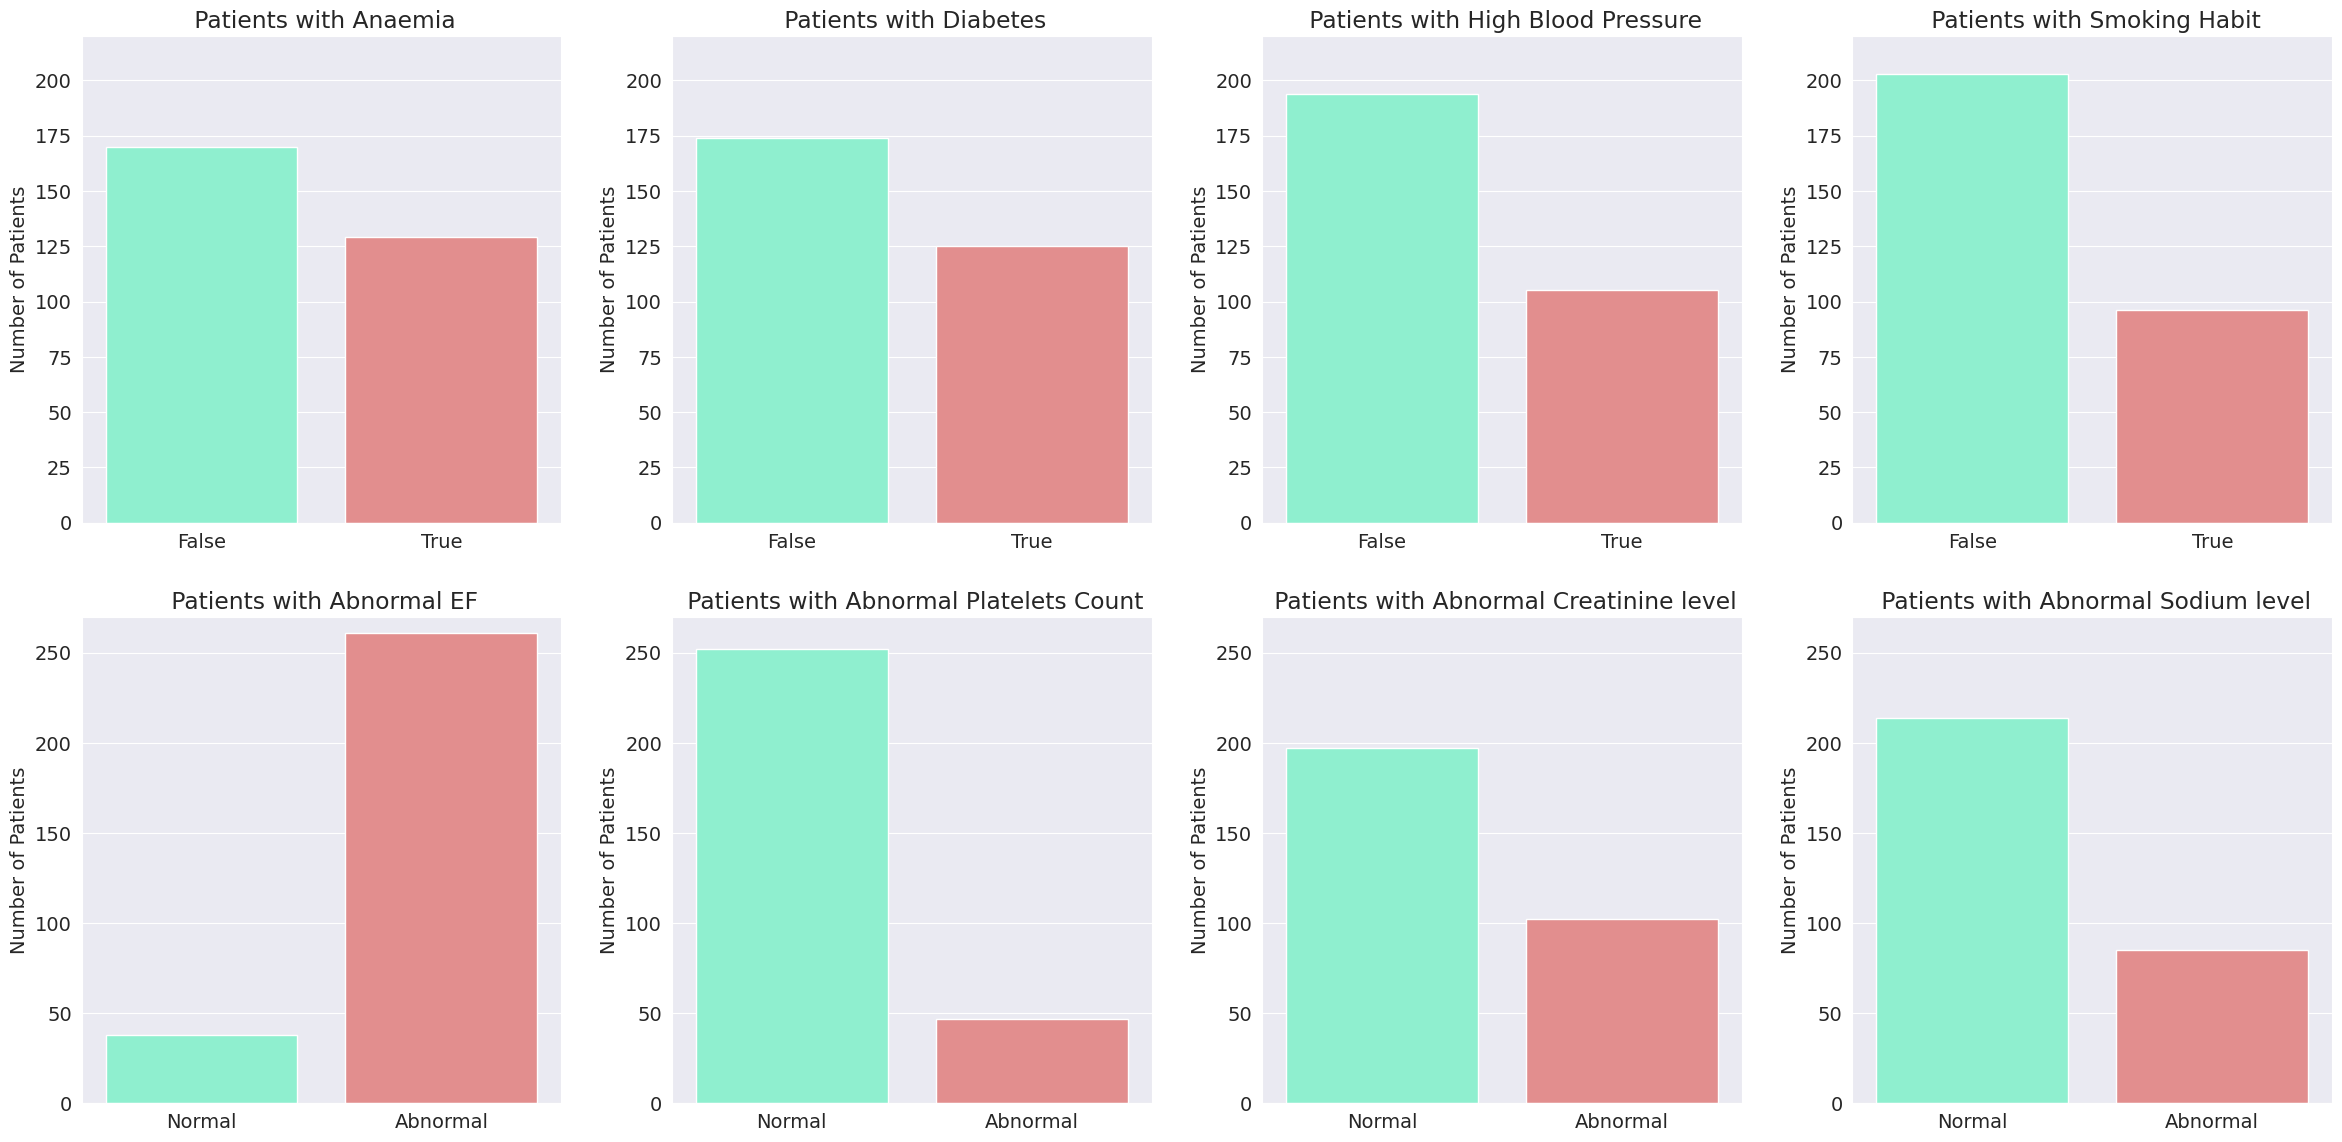

In [ ]:
fig,axis=plt.subplots(2,4,figsize=(24,12))
#axis(0,0) use this axis for Anaemia
axis[0,0].set_title(" Patients with Anaemia")
sns.countplot(x = heart_failure_df.anaemia, ax=axis[0,0], palette=['aquamarine', 'lightcoral'] )
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 220])

#axis(0,1) use this axis for Diabetes
axis[0,1].set_title(" Patients with Diabetes")
sns.countplot(x = heart_failure_df.diabetes, ax=axis[0,1], palette=['aquamarine', 'lightcoral'])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0, 220])


#axis(0,2) use this axis for High blood pressure
axis[0,2].set_title(" Patients with High Blood Pressure")
sns.countplot(x = heart_failure_df.high_blood_pressure, ax=axis[0,2], palette=['aquamarine', 'lightcoral'])
axis[0,2].set_xlabel("")
axis[0,2].set_ylabel("Number of Patients")
axis[0,2].set_ylim([0, 220])

#axis(0,3) use this axis for smoking habit
axis[0,3].set_title(" Patients with Smoking Habit")
sns.countplot(x = heart_failure_df.smoking, ax=axis[0,3], palette=['aquamarine', 'lightcoral'])
axis[0,3].set_xlabel("")
axis[0,3].set_ylabel("Number of Patients")
axis[0,3].set_ylim([0, 220])


#axis(1,0) use this axis for Ejection Fraction
axis[1,0].set_title(" Patients with Abnormal EF")
sns.countplot(x = heart_failure_df.abnormal_ef.sort_values(ascending =False) , ax=axis[1,0], palette=['aquamarine', 'lightcoral'])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set_ylim([0, 270])

#axis(1,1) use this axis for Platelets count
axis[1,1].set_title(" Patients with Abnormal Platelets Count")
sns.countplot(x = heart_failure_df.abnormal_platelets.sort_values(ascending =False) , ax=axis[1,1], palette=['aquamarine', 'lightcoral'])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set_ylim([0, 270])

#axis(1,2) use this axis for Creatinine level
axis[1,2].set_title(" Patients with Abnormal Creatinine level")
sns.countplot(x = heart_failure_df.abnormal_creatinine.sort_values(ascending =False), ax=axis[1,2], palette=['aquamarine', 'lightcoral'])
axis[1,2].set_xlabel("")
axis[1,2].set_ylabel("Number of Patients")
axis[1,2].set_ylim([0, 270])

#axis(1,3) use this axis for sodium level
axis[1,3].set_title(" Patients with Abnormal Sodium level")
sns.countplot(x = heart_failure_df.abnormal_sodium.sort_values(ascending =False), ax=axis[1,3], palette=['aquamarine', 'lightcoral'])
axis[1,3].set_xlabel("")
axis[1,3].set_ylabel("Number of Patients")
axis[1,3].set_ylim([0, 270])

#to provide spacing between adjacent plots
plt.tight_layout(pad=2);

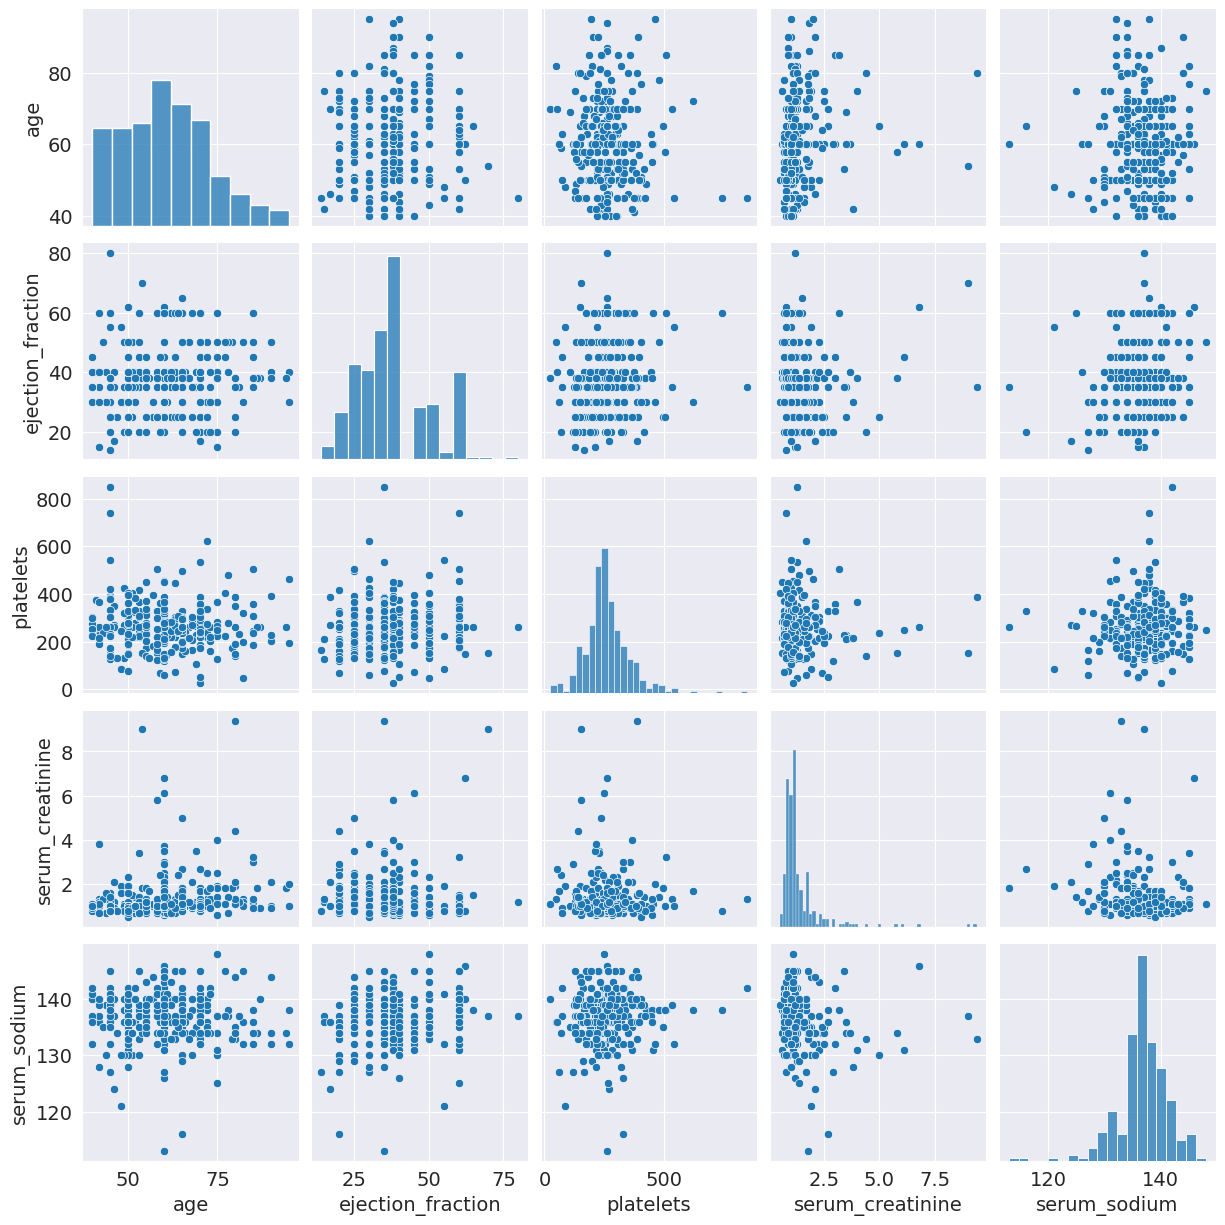

In [ ]:
#pair wise relationship
#filter columns with numeric value
numeric_column= heart_failure_df[['age','ejection_fraction','platelets','serum_creatinine','serum_sodium']]
sns.pairplot(numeric_column);

<Axes: title={'center': 'Distribution of Ejection Fraction'}, xlabel='ejection_fraction', ylabel='Count'>

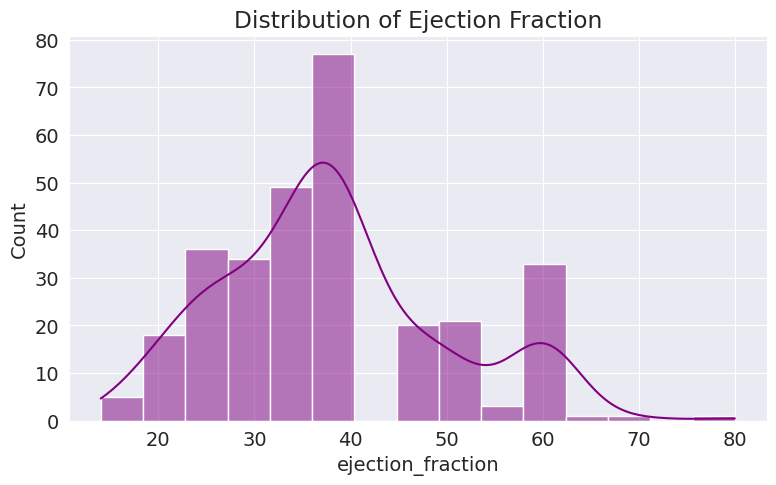

In [ ]:
plt.title("Distribution of Ejection Fraction")
sns.histplot(heart_failure_df.ejection_fraction, kde= True, color='purple')

<Axes: title={'center': 'Distribution of Platelets count'}, xlabel='platelets', ylabel='Count'>

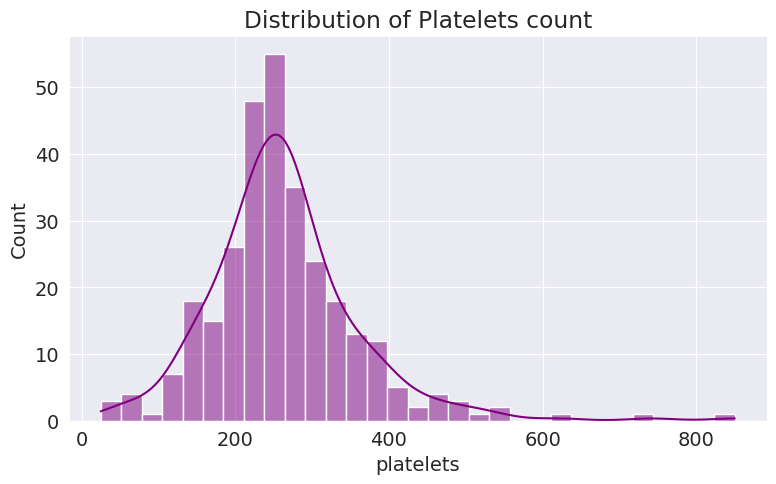

In [ ]:
plt.title("Distribution of Platelets count")
sns.histplot(heart_failure_df.platelets, kde= True, color='purple')

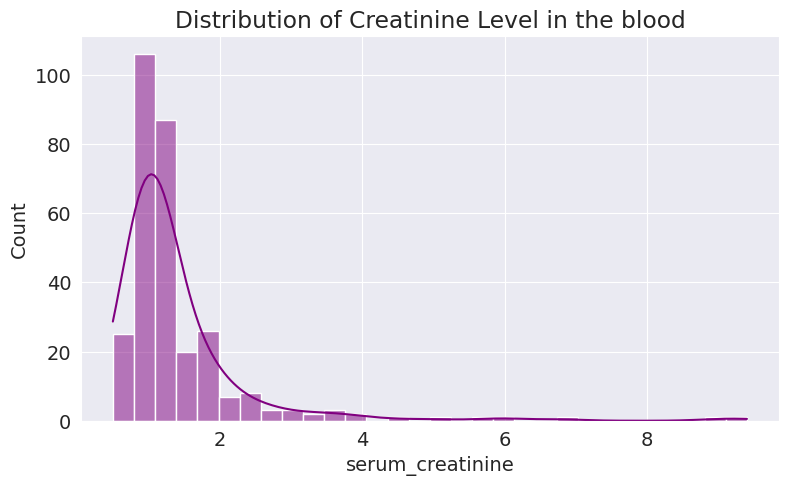

In [ ]:
plt.title("Distribution of Creatinine Level in the blood")
sns.histplot(heart_failure_df.serum_creatinine, kde= True,bins=30, color='purple');

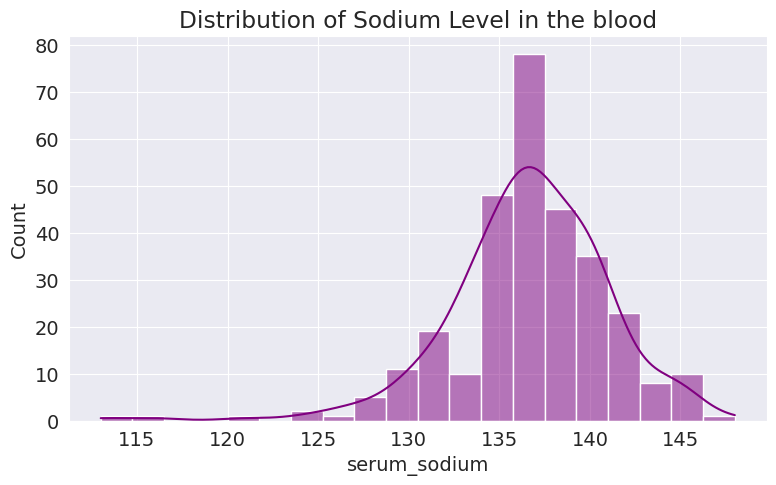

In [ ]:
plt.title("Distribution of Sodium Level in the blood")
sns.histplot(heart_failure_df.serum_sodium, kde= True, color='purple');